In [1]:
import torch
import numpy as np

def generate_data(seq_len: int, num_samples: int):
    X = []
    y = []
    for i in range(num_samples):
        start = np.random.normal(0, 4) * 2 * np.pi
        sequence = np.sin(np.linspace(start, start + seq_len * 0.1, seq_len))
        X.append(sequence)
        y.append(np.sin(start + seq_len * 0.1))
    # end for
    return np.array(X), np.array(y)
# end def

seq_len = 20 
num_samples = 500 
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
epochs = 200
batch_size = 2

X, y = generate_data(seq_len, num_samples)

X_train = torch.tensor(X[:450], dtype = torch.float32).unsqueeze(-1)
y_train = torch.tensor(y[:450], dtype = torch.float32).unsqueeze(-1)

X_test = torch.tensor(X[450:], dtype = torch.float32).unsqueeze(-1)
y_test = torch.tensor(y[450:], dtype = torch.float32).unsqueeze(-1)

In [2]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 25,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : True,
    'dropout_rate' : 0.4
}

model = ModelWrapper(type = 'lstm', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

Epoch [1/200], Loss: 0.2883050230884045, Val Loss: 0.01646643877029419
Epoch [2/200], Loss: 0.24539557207763815, Val Loss: 0.015342309139668941
Epoch [3/200], Loss: 0.2664954157221493, Val Loss: 0.014398148283362389
Epoch [4/200], Loss: 0.24096726591673157, Val Loss: 0.021882157772779465
Epoch [5/200], Loss: 0.24605446592852886, Val Loss: 0.018470056354999542
Epoch [6/200], Loss: 0.2647602239419292, Val Loss: 0.2991747558116913
Epoch [7/200], Loss: 0.2674931539227772, Val Loss: 0.01215065736323595
Epoch [8/200], Loss: 0.24948805206306537, Val Loss: 0.01585027202963829
Epoch [9/200], Loss: 0.2696616050584958, Val Loss: 0.11068582534790039
Epoch [10/200], Loss: 0.26851466949110747, Val Loss: 0.06877023726701736
Epoch [11/200], Loss: 0.25480329151472286, Val Loss: 0.02591588906943798
Epoch [12/200], Loss: 0.24290408580542944, Val Loss: 0.29396817088127136
Epoch [13/200], Loss: 0.2484672372493272, Val Loss: 0.5014823079109192
Epoch [14/200], Loss: 0.26830459866038936, Val Loss: 0.015362975

0.0671302005648613

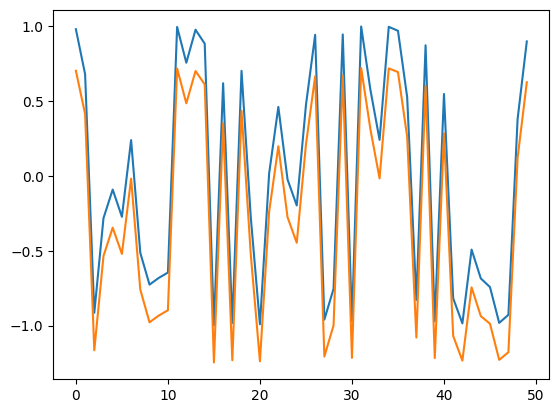

In [3]:
import matplotlib.pyplot as plt

pred = list(map(float, model.predict(X = X_test)))
true = list(map(float, y_test))

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [4]:
args = {
    'hidden_size' : 25,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : False,
    'dropout_rate' : 0.1
}

model = ModelWrapper(type = 'gru', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

Epoch [1/200], Loss: 0.08648780536800688, Val Loss: 0.009982455521821976
Epoch [2/200], Loss: 0.008238776697188668, Val Loss: 0.0016164747066795826
Epoch [3/200], Loss: 0.00817779829719964, Val Loss: 0.0022930956911295652
Epoch [4/200], Loss: 0.006213565520342349, Val Loss: 0.00266073876991868
Epoch [5/200], Loss: 0.006484631933352729, Val Loss: 0.0038330531679093838
Epoch [6/200], Loss: 0.005782723943302699, Val Loss: 0.0029006926342844963
Epoch [7/200], Loss: 0.0048763834664957055, Val Loss: 0.0012915213592350483
Epoch [8/200], Loss: 0.005009066532277049, Val Loss: 0.0010598622029647231
Epoch [9/200], Loss: 0.0048351033403385675, Val Loss: 0.00133611005730927
Epoch [10/200], Loss: 0.005128186865282866, Val Loss: 0.0025202331598848104
Epoch [11/200], Loss: 0.0052270181340535755, Val Loss: 0.0018511494854465127
Epoch [12/200], Loss: 0.00413687795734303, Val Loss: 0.0013286786852404475
Epoch [13/200], Loss: 0.004702676228100447, Val Loss: 0.0032104304991662502
Epoch [14/200], Loss: 0.00

4.133753463975154e-05

In [5]:
from sklearn.metrics import mean_squared_error

pred = list(map(float, model.predict(X = X_test)))
true = list(map(float, y_test))
mse = mean_squared_error(true, pred)
print(f'{mse:10f}')

  0.000041


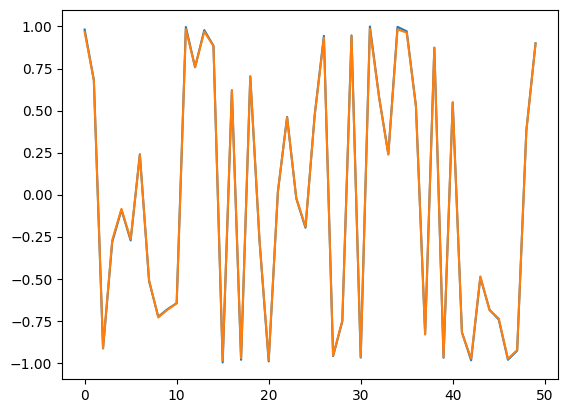

In [6]:
plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)